In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [ ]:
df = pd.read_excel("Palawan_Languages_Dataset_2013_2022.xlsx")


In [18]:
languages = [
    "Cuyonon", "Palaw'an", "Batak", "Tagbanwa_Calamianen", "Tagbanwa_Central",
    "Molbog", "Agutaynen", "Ibaloi", "Imuruknon", "Asi",
    "Kalagan", "Sangir", "Tau't Batu", "Southern Palawan", "Bulalakaw"
]

years = list(range(2013, 2023))  # 2013 to 2022 inclusive

rows = []
np.random.seed(42)

for lang in languages:
    base_speakers = np.random.randint(1000, 50000)
    base_literacy = np.random.normal(70, 8)
    base_dialects = np.random.randint(1, 4)
    base_internet = np.random.randint(0, 3)

    for year in years:
        speakers = max(100, int(base_speakers + (year - 2013)*np.random.uniform(-500, 1000)))
        literacy_rate = np.clip(base_literacy + (year - 2013)*np.random.uniform(-0.5, 0.7), 30, 100)
        number_of_dialects = max(1, base_dialects + np.random.randint(-1, 2))
        internet_presence = min(2, max(0, base_internet + (year - 2013)//5 + np.random.randint(-1, 2)))

        rows.append({
            'Language': lang,
            'Year': year,
            'Speakers': speakers,
            'Literacy_Rate': round(literacy_rate, 2),
            'Number_of_Dialects': number_of_dialects,
            'Internet_Presence': internet_presence
        })



In [20]:
df_clean = df.dropna()

# Step 3: Verify at least 100 data points after cleaning
print("Number of data points after cleaning:", len(df_clean))

Number of data points after cleaning: 150


In [21]:
speakers_arr = df_clean['Speakers'].values
mean_speakers = np.mean(speakers_arr)
median_speakers = np.median(speakers_arr)
std_speakers = np.std(speakers_arr)
min_speakers = np.min(speakers_arr)
max_speakers = np.max(speakers_arr)

print(f"Speakers - Mean: {mean_speakers}, Median: {median_speakers}, Std: {std_speakers}, Min: {min_speakers}, Max: {max_speakers}")

Speakers - Mean: 27927.74, Median: 25451.0, Std: 11726.069554873591, Min: 10948, Max: 53060


In [22]:
literacy_arr = df_clean['Literacy_Rate'].values
k2, p_value = stats.normaltest(literacy_arr)
print(f"SciPy normaltest on Literacy Rate: statistic={k2}, p-value={p_value}")

SciPy normaltest on Literacy Rate: statistic=1.9867231656280369, p-value=0.37032970230560774


In [23]:
X = sm.add_constant(df_clean['Literacy_Rate'])
model = sm.OLS(df_clean['Speakers'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Speakers   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.679
Date:                Wed, 28 May 2025   Prob (F-statistic):              0.197
Time:                        17:45:51   Log-Likelihood:                -1617.4
No. Observations:                 150   AIC:                             3239.
Df Residuals:                     148   BIC:                             3245.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.356e+04   1.11e+04      1.218

In [24]:
X2 = sm.add_constant(df_clean['Number_of_Dialects'])
model2 = sm.OLS(df_clean['Speakers'], X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               Speakers   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     5.229
Date:                Wed, 28 May 2025   Prob (F-statistic):             0.0236
Time:                        17:45:57   Log-Likelihood:                -1615.7
No. Observations:                 150   AIC:                             3235.
Df Residuals:                     148   BIC:                             3241.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.381e+04   2035

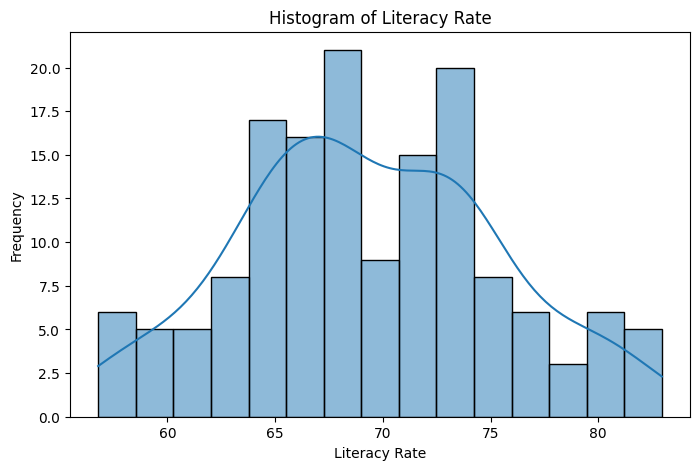

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean['Literacy_Rate'], bins=15, kde=True)
plt.title('Histogram of Literacy Rate')
plt.xlabel('Literacy Rate')
plt.ylabel('Frequency')
plt.show()

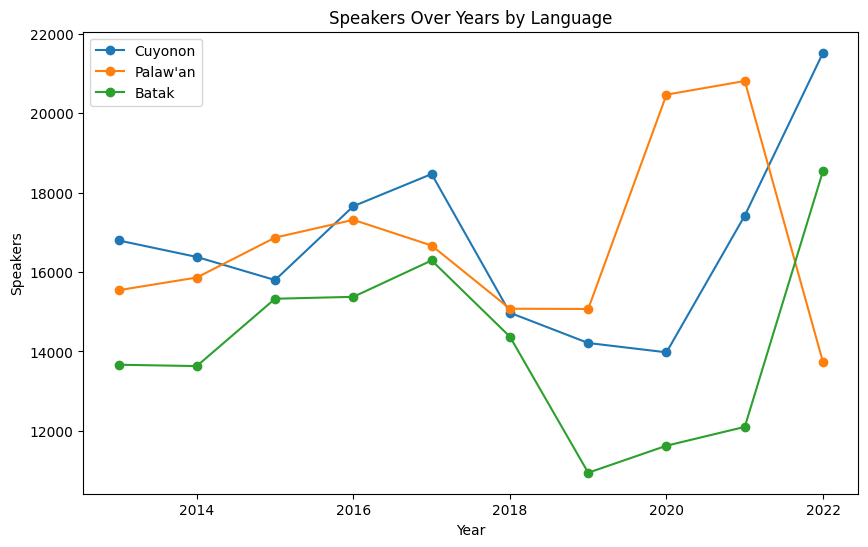

In [26]:
plt.figure(figsize=(10,6))
for lang in ['Cuyonon', "Palaw'an", 'Batak']:
    subset = df_clean[df_clean['Language'] == lang]
    plt.plot(subset['Year'], subset['Speakers'], marker='o', label=lang)
plt.title('Speakers Over Years by Language')
plt.xlabel('Year')
plt.ylabel('Speakers')
plt.legend()
plt.show()

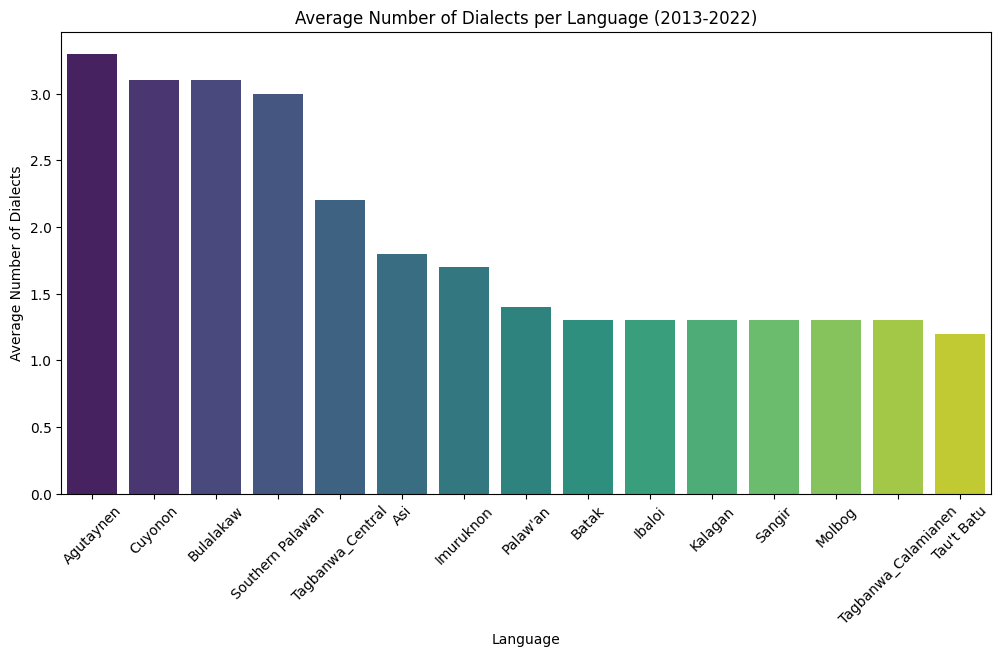

In [27]:
plt.figure(figsize=(12,6))
avg_dialects = df_clean.groupby('Language')['Number_of_Dialects'].mean().sort_values(ascending=False)
sns.barplot(x=avg_dialects.index, y=avg_dialects.values, hue=avg_dialects.index, palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title('Average Number of Dialects per Language (2013-2022)')
plt.ylabel('Average Number of Dialects')
plt.xlabel('Language')
plt.show()

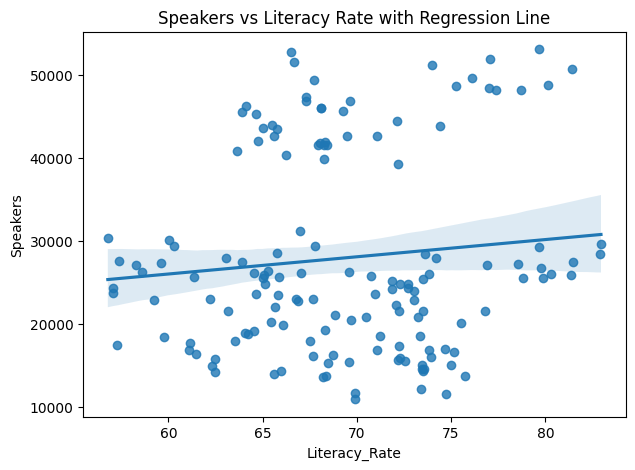

In [28]:
plt.figure(figsize=(7,5))
sns.regplot(x='Literacy_Rate', y='Speakers', data=df_clean)
plt.title('Speakers vs Literacy Rate with Regression Line')
plt.show()

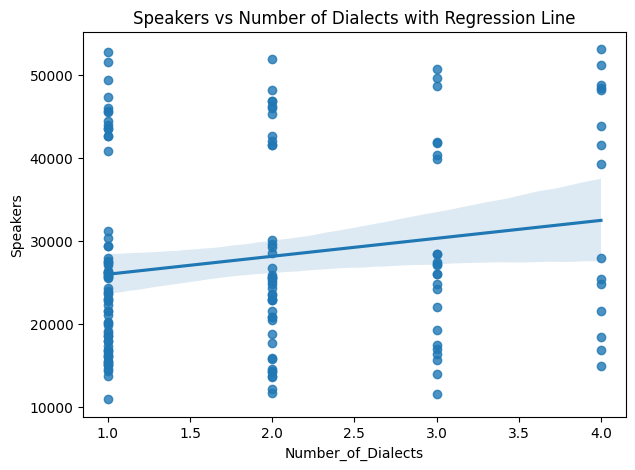

In [29]:
plt.figure(figsize=(7,5))
sns.regplot(x='Number_of_Dialects', y='Speakers', data=df_clean)
plt.title('Speakers vs Number of Dialects with Regression Line')
plt.show()